video link: https://pitt.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=bf28616a-f0ef-499e-bece-af3a01206273

In [424]:
import nbconvert
import pandas as pd 
import seaborn as sb
import matplotlib as plt
import matplotlib.pyplot as pyplt
import PIL as plw
import scipy.stats as stats

# Does DC Comics Represent Gender Equally?

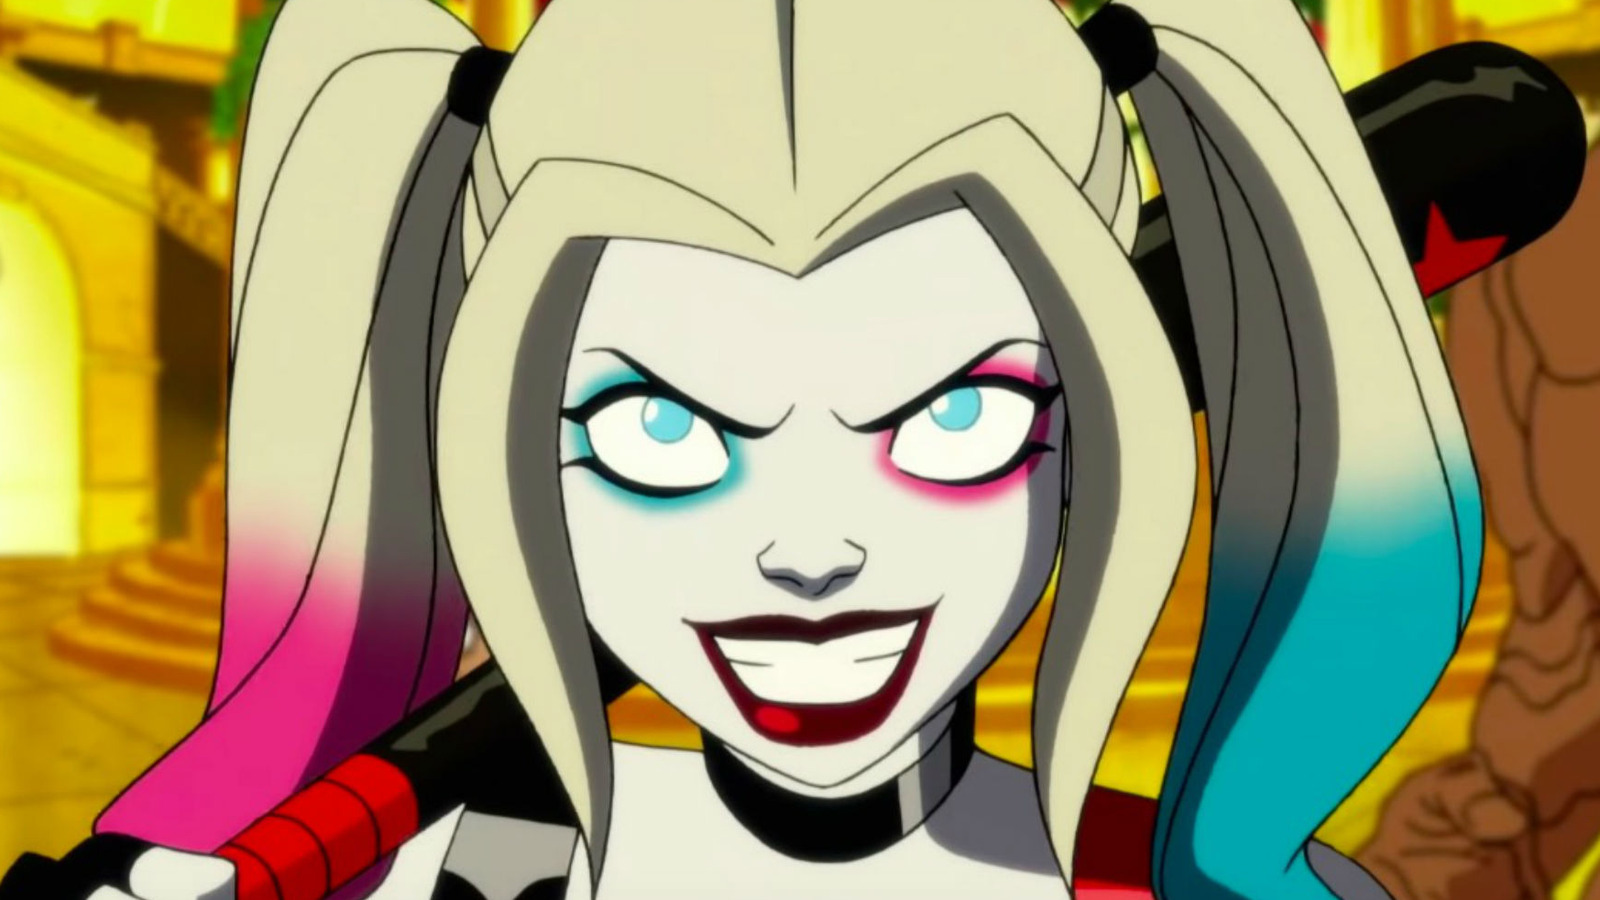

In [425]:
from PIL import Image
harlz = Image.open("harley.jpg");
display(harlz)

*Harley Quinn, in her new animated series on HBO Max. In the last eight years, Harley has appeared in over 600 DC comics issues. As we're about to see, that's a promising trend compared to where DC was in 2014.* 

With superhero adaptations continuing to balloon, in recent years we have seen discussion over whether creators are seeking to be "more representative". It is worth examining then, how representative comics have been over time. I found publicly available demographic data on DC Comics and, using Python, modified the dataset and ran tests to analyze the question: *How has gender been represented by DC Comics?*

### High Level Overview:
The source dataset was from Kaggle: a table of over 6000 DC characters made through 2014 web scraping of fandom wiki. Small modifications were made to the *sex* variable to better capture the nature of the research question. *Number of appearances* were the observed statistic of interest. Analysis of representation used chi-square methods that focus on *observed counts vs expected counts*: within each gender group (female, male, nonbinary) cumulative observed appearances were compared to *expected* cumulative appearances. *Expected* was calculated as, the count we would expect in each group, given the *total number of appearances across all characters* and assuming that the percentage breakdown by each group would reflect the percentage breakdown of female, male, nonbinary in the US (from census data). In addition to overall analysis, this process was repeated in stratified groups. 

### Findings:
DC overrepresents men, while underrepresenting women and vastly underrepresenting nonbinary people (p=0). 

## Source Dataset: 

I acquired a source dataset from Kaggle. The dataset was made in 2014 by scraping data from DC's fandom wiki pages.

Top 3 observations:

In [426]:
dc = pd.read_csv("dc-comics.csv")
dc.head(3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,"1959, October",1959.0


In [427]:
dc.drop(10, inplace = True)
dc.head(11)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,"1940, April",1940.0
5,1448,Wonder Woman (Diana Prince),\/wiki\/Wonder_Woman_(Diana_Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,1231.0,"1941, December",1941.0
6,1486,Aquaman (Arthur Curry),\/wiki\/Aquaman_(Arthur_Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1121.0,"1941, November",1941.0
7,1451,Timothy Drake (New Earth),\/wiki\/Timothy_Drake_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1095.0,"1989, August",1989.0
8,71760,Dinah Laurel Lance (New Earth),\/wiki\/Dinah_Laurel_Lance_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1075.0,"1969, November",1969.0
9,1380,Flash (Barry Allen),\/wiki\/Flash_(Barry_Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1028.0,"1956, October",1956.0


## Modifications to the Source:

To properly address the research question, I found it necessary to make some slight modifications to the dataset.

### Capturing Gender with Greater Accuracy

To better capture the essence of this question, I felt transformations of the 'Sex' variable was necessary, for multiple reasons. First, it is not stated what the dataset meant by “sex”. Second, “Sex” is a clunkier, more ambiguous term than we are generally led to believe. Chromosomal definitions of it fail to capture biological essence; a person born XY could have a brain that is more in line with what would typically be seen XX (this is the case with most transgender women) and if that person undergoes hormone replacement therapy, they will have more and more in common with “typically XX” people. Furthermore, it is possible to be born intersex – XXY for example and either have a mix of androgynous traits or “pass” entirely as one sex or the other. Third, in any instance, this dataset’s attempted utilization of “sex” was especially uninformative for transgender characters – transgender women in this dataset have had their sex referred to, depending on the character, as any of the following: “Female”, “Male”, “Transgender”, “Genderless”, i.e. all four possible categories. (I identified transgender characters by using DC’s list of transgender characters and focusing only on those which appear in the dataset). It is clear the data collector did not give careful thought to defining “sex” and also rushed their value inputs for trans characters. Fourth, since the research question is social in nature, *gender*, defined as a person's social identity, is what is of most interest to capture.

Therefore, I generated a *gender* variable that I feel better fits the research question.

To perform the transformation I first made two changes: 

- First, I recoded the ‘sex’ variable to gender (using the “rename” pandas function).

- Second, I changed values (using .loc) for the characters in the table below, third, after making those changes, I dropped the remaining characters with a gender value of either NAN or "Genderless Characters".


#### How I Researched Trans Characters:

The dataset was scraped from DC's fandom wiki pages. I found [DC's page dedicated to transgender characters] (https://dc.fandom.com/wiki/Category:Transgender_Characters) and ran a query by using python's ```str.contains()``` function and its ```join()``` function to match inclusively:

In [428]:
trans_characters = ["Alysia Yeoh", "Andrea Martinez", "Aruna Shende", "Bia", "Burke Day",  "Daystar","Dinah Lance",
                   "Echo", "Kate Godwin", "Masquerade", "Nia Nal","Pado Swakatoon", "Shvaughn Erin",
                   "Stephen Forrest Lee", "Susan Su", "Taylor Barzelay", "Victoria October", "Wanda Mann"]
dc[dc.name.str.contains('|'.join(trans_characters))]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
942,92263,Bianca Reyes (New Earth),\/wiki\/Bianca_Reyes_(New_Earth),Public Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,Living Characters,29.0,"2006, May",2006.0
1353,4887,Kate Godwin (New Earth),\/wiki\/Kate_Godwin_(New_Earth),Secret Identity,Good Characters,Brown Eyes,Blond Hair,Female Characters,Deceased Characters,19.0,"1993, September",1993.0
2767,153267,Stephen Forrest Lee (New Earth),\/wiki\/Stephen_Forrest_Lee_(New_Earth),NaN,Bad Characters,Blue Eyes,NaN,Male Characters,Deceased Characters,8.0,"1988, July",1988.0
3877,317067,Daystar (New Earth),\/wiki\/Daystar_(New_Earth),NaN,Bad Characters,NaN,NaN,Transgender Characters,Deceased Characters,4.0,"2009, October",2009.0
5079,10711,Aruna Shende (New Earth),\/wiki\/Aruna_Shende_(New_Earth),Secret Identity,Good Characters,Brown Eyes,Black Hair,Genderless Characters,Living Characters,2.0,"2000, August",2000.0
5084,185196,Doctor Echo (New Earth),\/wiki\/Doctor_Echo_(New_Earth),Secret Identity,Bad Characters,NaN,Black Hair,Male Characters,Deceased Characters,2.0,"2000, March",2000.0
6013,309400,Andrea Martinez (New Earth),\/wiki\/Andrea_Martinez_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,Living Characters,1.0,"1997, October",1997.0


Bianca was a false match (she is not in the transgender wiki; her name just starts with "Bia"), same with Doctor Echo. I researched the remainder. From their wiki pages, I found strong evidence Kate, Daystar, Aruna, and Andrea are all transgender women. 

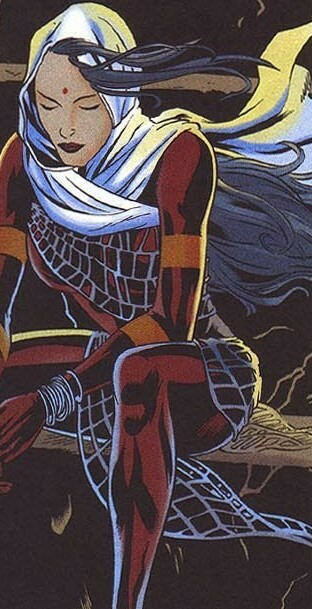

In [429]:
aruna_img = Image.open("aruna_shende.jpg");
display(aruna_img)

*Aruna Shende*

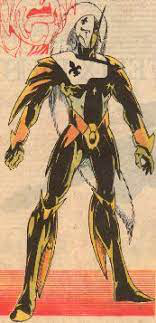

In [430]:
lee_img = Image.open("stephen_forrest_lee.jpg")
display(lee_img)

*Stephen Forrest Lee*

Stephen Forrest Lee, on the other hand, is a shapeshifter who considers themselves to be fully whichever gender they present as in a given moment. Consistent gender swapping of identity is known as genderfluidity, a form of nonbinary gender identity. Hence, Stephen became the only character in this dataset observed as nonbinary.

In [431]:
dictGenderChanges = {'Character': ['Aruna Shende','Andrea Martinez','Daystar', 'Stephen Forrest Lee'],
                'Old Dataset Value': ['Genderless', 'Male', 'Transgender','Male'],
                'New Dataset Value':   ['Female', 'Female', 'Female', 'Nonbinary'],
             }
pd.DataFrame(dictGenderChanges)

,Character,Old Dataset Value,New Dataset Value
0,Aruna Shende,Genderless,Female
1,Andrea Martinez,Male,Female
2,Daystar,Transgender,Female
3,Stephen Forrest Lee,Male,Nonbinary


#### First transformation: rename variable and recode trans characters

Using ```loc()``` I located the noted characters and changed their *GENDER* values.

In [432]:


dc = dc.rename(columns = {"SEX" : "GENDER"})
dc.loc[dc.name.str.contains("Shende"), "GENDER"] = "Female Characters"

dc.loc[dc.name.str.contains("Andrea Martinez"), "GENDER"] = "Female Characters"

dc.loc[dc.name.str.contains("Daystar"), "GENDER"] = "Female Characters"
dc.loc[dc.name.str.contains("Daystar"), "Transgender"] = "Yes"


dc.loc[dc.name.str.contains("Stephen Forrest"), "GENDER"] = "Nonbinary Characters"
dc[(dc.name.str.contains('|'.join(trans_characters))) & (dc.name != "Bianca Reyes (New Earth)") &
  (dc.name != "Doctor Echo (New Earth)")]


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,GENDER,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Transgender
1353,4887,Kate Godwin (New Earth),\/wiki\/Kate_Godwin_(New_Earth),Secret Identity,Good Characters,Brown Eyes,Blond Hair,Female Characters,Deceased Characters,19.0,"1993, September",1993.0,NaN
2767,153267,Stephen Forrest Lee (New Earth),\/wiki\/Stephen_Forrest_Lee_(New_Earth),NaN,Bad Characters,Blue Eyes,NaN,Nonbinary Characters,Deceased Characters,8.0,"1988, July",1988.0,NaN
3877,317067,Daystar (New Earth),\/wiki\/Daystar_(New_Earth),NaN,Bad Characters,NaN,NaN,Female Characters,Deceased Characters,4.0,"2009, October",2009.0,Yes
5079,10711,Aruna Shende (New Earth),\/wiki\/Aruna_Shende_(New_Earth),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,Living Characters,2.0,"2000, August",2000.0,NaN
6013,309400,Andrea Martinez (New Earth),\/wiki\/Andrea_Martinez_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,Living Characters,1.0,"1997, October",1997.0,NaN


In [433]:
dc.GENDER.value_counts()

Male Characters          4781
Female Characters        1969
Genderless Characters      19
Nonbinary Characters        1
Name: GENDER, dtype: int64

#### Why I removed null and "genderless" characters

I queried both null gender and genderless characters. The number of each was quite large, and a first glance suggested most of these characters could not be mapped to a gender that would be in any way useful to our analysis -- many of these characters were inanimate objects that acquired sentience. I was also reasonably confident, having researched transgender characters, that I had already covered and transformed any characters in these categories who were trans and simply misclassified out of confusion. As a disclaimer, it is always *possible* to imagine two scenarios: the wiki is incomplete on trans characters, or that a cis character got misclassified as genderless/NAN. In regards to the first, this analysis is dependent on trusting dc's fandom wiki, and in regards to the second, I believe it's extremely unlikely cis characters would not simply be mapped to their gender.

In [434]:
dc[dc.GENDER.isnull()]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,GENDER,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Transgender
242,12290,Khaji Da (New Earth),\/wiki\/Khaji_Da_(New_Earth),Secret Identity,Good Characters,NaN,NaN,NaN,Living Characters,121.0,"1964, June",1964.0,NaN
343,174719,Rosabelle Mendez (New Earth),\/wiki\/Rosabelle_Mendez_(New_Earth),Secret Identity,Good Characters,Red Eyes,NaN,NaN,Deceased Characters,86.0,"1991, February",1991.0,NaN
352,1906,Parallax (New Earth),\/wiki\/Parallax_(New_Earth),Secret Identity,Bad Characters,NaN,NaN,NaN,Living Characters,84.0,"1994, March",1994.0,NaN
514,2751,Chemo (New Earth),\/wiki\/Chemo_(New_Earth),Public Identity,Bad Characters,NaN,NaN,NaN,Living Characters,58.0,"1962, July",1962.0,NaN
628,34418,Ion (New Earth),\/wiki\/Ion_(New_Earth),Secret Identity,Good Characters,Green Eyes,NaN,NaN,Deceased Characters,45.0,"2006, April",2006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,185733,Dungeon (New Earth),\/wiki\/Dungeon_(New_Earth),NaN,Bad Characters,NaN,NaN,NaN,Living Characters,NaN,"1996, April",1996.0,NaN
6731,185321,Doctor Vortex (New Earth),\/wiki\/Doctor_Vortex_(New_Earth),NaN,Bad Characters,NaN,NaN,NaN,Living Characters,NaN,"1993, December",1993.0,NaN
6736,192434,Quote (New Earth),\/wiki\/Quote_(New_Earth),NaN,Bad Characters,NaN,NaN,NaN,Living Characters,NaN,"1993, December",1993.0,NaN
6835,144269,M'Dahna (New Earth),\/wiki\/M%27Dahna_(New_Earth),Secret Identity,Good Characters,Brown Eyes,NaN,NaN,Living Characters,NaN,"1981, June",1981.0,NaN


There are 125 characters with no gender value. They will be dropped from the dataset.

In [435]:
dc = dc[dc.GENDER.notnull()]
dc.shape

(6770, 13)

In [436]:
dc[dc.GENDER.str.contains("Genderless")]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,GENDER,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Transgender
796,43227,Larvox (New Earth),\/wiki\/Larvox_(New_Earth),Public Identity,Good Characters,Black Eyes,Orange Hair,Genderless Characters,Living Characters,36.0,"1961, December",1961.0,NaN
905,117065,Quislet (Pre-Zero Hour),\/wiki\/Quislet_(Pre-Zero_Hour),Public Identity,Good Characters,NaN,NaN,Genderless Characters,Living Characters,31.0,"1985, September",1985.0,NaN
906,20222,Apros (New Earth),\/wiki\/Apros_(New_Earth),Public Identity,Good Characters,NaN,NaN,Genderless Characters,Living Characters,31.0,"1981, May",1981.0,NaN
920,54126,Kelex (New Earth),\/wiki\/Kelex_(New_Earth),Public Identity,Neutral Characters,Photocellular Eyes,NaN,Genderless Characters,Deceased Characters,30.0,"1988, February",1988.0,NaN
1122,2703,Kilg%re (New Earth),\/wiki\/Kilg%25re_(New_Earth),Public Identity,Bad Characters,Photocellular Eyes,NaN,Genderless Characters,Living Characters,24.0,"1987, August",1987.0,NaN
1294,1974,Desire (New Earth),\/wiki\/Desire_(New_Earth),Secret Identity,Neutral Characters,Yellow Eyes,NaN,Genderless Characters,Living Characters,20.0,"1989, November",1989.0,NaN
1870,25457,Solaris (DC One Million),\/wiki\/Solaris_(DC_One_Million),Public Identity,Bad Characters,NaN,NaN,Genderless Characters,Deceased Characters,13.0,"1998, November",1998.0,NaN
2145,394677,Hyper-Adapter (New Earth),\/wiki\/Hyper-Adapter_(New_Earth),Public Identity,Bad Characters,NaN,NaN,Genderless Characters,Living Characters,11.0,"1990, August",1990.0,NaN
2254,98792,Despotellis (New Earth),\/wiki\/Despotellis_(New_Earth),Public Identity,Bad Characters,NaN,NaN,Genderless Characters,Living Characters,10.0,"2007, May",2007.0,NaN
2677,13382,Mageddon (New Earth),\/wiki\/Mageddon_(New_Earth),NaN,Bad Characters,NaN,NaN,Genderless Characters,Living Characters,8.0,"1998, February",1998.0,NaN


Those with "genderless" will also be dropped. 

In [437]:
dc = dc[dc.GENDER != "Genderless Characters"]
dc.GENDER.value_counts()

Male Characters         4781
Female Characters       1969
Nonbinary Characters       1
Name: GENDER, dtype: int64

# Analyzing Representation After Transforming

With the modified dataset in hand, I proceed with analysis. I want to declare some limitations of this analysis and recommend future projects:

- This dataset is eight years old. I tried finding newer ones (to no avail) and then tried my hand at creating my own through webscraping (again, to no avail). So its most recent data is 2014. An excellent follow up project would be scraping the wiki pages again and seeing if the last 8 years have brought about changes.
- The analysis I am conducting here uses "number of appearances" to measure representation. An appearance is when a character appears in a comic issue. The statistic "appearances" does not capture how much or little a character is featured when they appear. Alternative methods of measuring a deeper level of detail, such as page count, words spoken, or number of times drawn would be interesting to measure in future analyses, but none of those statistics are readily available at this time. It would also be interesting to see how well representation looks in movies and television now that so many adapatations have appeared.
- Also due to dataset limitations, I was only able to focus on *gender* representation and can't claim to be comprehensively tackling the issue of representation. Future studies should look at sexual orientation, race, disability status, and other social variables of interest.
- Although nonbinary gender is measured, my analysis does not measure how well-represented transgender populations as a whole are. Transgender men did not appear in the dataset. Transgender women are included in calculating representation of women overall, but I do not tackle whether trans women (or trans men) *specifically* are being properly represented.


So, what is the breakdown by gender of appearances of DC characters? Let's take a look:

### Observed Counts:

This is the total number of comic issue appearances by gender. It's obtained by dividing the data into three gender groups, and summing each character's number of appearances within each group. For instance, our only nonbinary character has 8 appearances, giving Nonbinary Characters a total of 8, but if another nonbinary character had 4, the observed count for the group would be 12.

In [438]:
sumApp = dc.groupby(dc.GENDER).APPEARANCES.sum()

In [439]:
sumApp

GENDER
Female Characters        41250.0
Male Characters         110902.0
Nonbinary Characters         8.0
Name: APPEARANCES, dtype: float64

In [440]:
dc.APPEARANCES.sum()

152160.0

This is the total number of appearances by all characters, which will be important for calculating *expected* counts.

### Methodology: Calculating Expected Representation and Comparing it to the Observed

As seen above, categories of gender for this study will be Female, Male, and Nonbinary.

I define Expected Representation as: The total number of appearances expected by gender, based on the U.S. Population. To be precise, the number is calculated for each gender in a group by multiplying *total appearances* (among all genders) times the *percentage of the U.S. population that gender makes up*.

Data from the US Census indicates approximately 50.7% of the US population is female, 48.9% male, and 0.4% nonbinary. The total appearances by all characters from this dataset is 153188. So, for instance, the *expected appearances* for women is equal to *0.507 times 153188*.

**Contingency tables** are produced to compare expected representation to observed representation. Contingency tables are produced by creating a dictionary with relevant values and converting it to a pandas df. In addition I will use a **chi-squared goodness of fit test** to evaluate whether differences between *expected* appearances by gender and *actual* apppearances by gender are large enough to not have occurred by random chance. **The null hypothesis is that the distribution of appearances by gender is representative of the distribution of gender in the U.S.** Chi-squared compares that expected count to the actual count, and tests whether the difference is small enough to be attributed to random chance. Chi-squared GOF can be imported from scipy.stats (function documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html?highlight=chisquare#scipy.stats.chisquare)


To sum, the chi-squared test will tell us whether the difference is large enough that it couldn't have occurred randomly, while the contigency tables provide visualization of how large the difference is, exactly.

## Discrepancies in Representation, Overall by Gender:

In [441]:
dictCounts = {'Gender': ['Female','Male','Nonbinary'],
                'Expected Sum of Appearances': [.507*153188, .489*153188, .004*153188],
                'Actual Sum of Appearances':   [42280, 110900, 8],
             }
count_compare = pd.DataFrame(dictCounts, columns=['Gender', 'Expected Sum of Appearances', 'Actual Sum of Appearances'])
count_compare['Difference'] =  count_compare['Actual Sum of Appearances'] - count_compare['Expected Sum of Appearances']
count_compare['% Difference'] = count_compare['Difference'] / count_compare['Expected Sum of Appearances']
count_compare

,Gender,Expected Sum of Appearances,Actual Sum of Appearances,Difference,% Difference
0,Female,77666.316,42280,-35386.316,-0.455620
1,Male,74908.932,110900,35991.068,0.480464
2,Nonbinary,612.752,8,-604.752,-0.986944


Each gender is *expected* to have a number of appearances proportional to the percentage of the U.S. population they make up. As we see, men are greatly overrepresented, while women and nonbinary people are greatly underrepresented, with the latter being especially underrepresented. We see 45% less women, 48% more men, and 98% less nonbinary people than we would expect.

In [442]:
stats.chisquare(f_obs = [42280, 110900, 8], f_exp = [.507*153188, .489*153188, .004*153188])

Power_divergenceResult(statistic=34011.98827439347, pvalue=0.0)

The p value of 0 means we reject the null; there is strong statistical evidence that these proportions are not representative. The difference in count of appearances versus expected counts based on demographics is too great to be attributed to random chance.

### Plots: Expected vs Actual Appearances by Gender

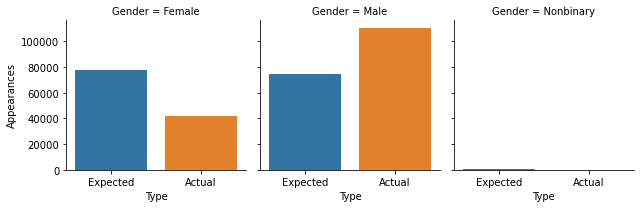

In [443]:
count_compare = count_compare.rename(columns = {'Expected Sum of Appearances' : 'Expected', 'Actual Sum of Appearances': 'Actual'})
countShort = count_compare[['Gender','Expected','Actual']]
countLong = pd.melt(countShort, id_vars = 'Gender', var_name = 'Type', value_name = 'Appearances' )

sb.catplot(
    data = countLong, x = 'Type', y= 'Appearances', 
    col = "Gender", height=3, kind = 'bar'
)

### Enlarged Plot for Nonbinary:

<AxesSubplot:xlabel='Type', ylabel='Appearances'>

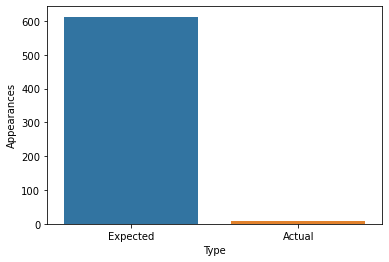

In [444]:
countLongNB = countLong[countLong.Gender == 'Nonbinary']
sb.barplot(
    data = countLongNB, x = 'Type', y= 'Appearances', 
)

In [445]:
def getcontingencyTable(m,f,nb,total_appearances):
    dict = {'Gender': ['Female','Male','Nonbinary'],
                'Expected Sum of Appearances': [.507*total_appearances, .489*total_appearances, .004*total_appearances],
                'Actual Sum of Appearances':   [m, f, nb],
             }
    df = pd.DataFrame(dict, columns=['Gender', 'Expected Sum of Appearances', 'Actual Sum of Appearances'])
    df = df.round(decimals = 3)
    df['Difference'] =  df['Actual Sum of Appearances'] - df['Expected Sum of Appearances']
    df['% Difference'] = df['Difference'] / df['Expected Sum of Appearances']
    return(df)

## Representation Stratified by Alignment

It is of interest to see how representation looks in evil characters compared to good. Do the discrepancies disappear, diminish, reverse, increase, or stay the same in each group? I created two new dataframes, one with all "bad characters" and another with all "good characters".

In [446]:
dc_good = dc[dc.ALIGN == "Good Characters"]
dc_evil = dc[dc.ALIGN == "Bad Characters"]

In [447]:
totalapp_good = dc_good.APPEARANCES.sum()
totalapp_bad = dc_evil.APPEARANCES.sum()

In [448]:
dc_evil.head(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,GENDER,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Transgender
19,1480,Alexander Luthor (New Earth),\/wiki\/Alexander_Luthor_(New_Earth),Public Identity,Bad Characters,Green Eyes,NaN,Male Characters,Living Characters,677.0,"1986, October",1986.0,NaN
30,1455,Joker (New Earth),\/wiki\/Joker_(New_Earth),Secret Identity,Bad Characters,Green Eyes,Green Hair,Male Characters,Living Characters,517.0,"1940, June",1940.0,NaN
44,1514,Uxas (New Earth),\/wiki\/Uxas_(New_Earth),Public Identity,Bad Characters,Red Eyes,NaN,Male Characters,Deceased Characters,388.0,"1970, December",1970.0,NaN
66,1471,Harvey Dent (New Earth),\/wiki\/Harvey_Dent_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Brown Hair,Male Characters,Living Characters,306.0,"1942, August",1942.0,NaN
107,1675,Jonathan Crane (New Earth),\/wiki\/Jonathan_Crane_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Brown Hair,Male Characters,Living Characters,222.0,"1941, September",1941.0,NaN
135,37701,Waylon Jones (New Earth),\/wiki\/Waylon_Jones_(New_Earth),Public Identity,Bad Characters,Red Eyes,NaN,Male Characters,Living Characters,180.0,"1983, March",1983.0,NaN
137,1518,Gorilla Grodd (New Earth),\/wiki\/Gorilla_Grodd_(New_Earth),Public Identity,Bad Characters,Grey Eyes,Black Hair,Male Characters,Living Characters,179.0,"1959, May",1959.0,NaN
138,4778,Talia al Ghul (New Earth),\/wiki\/Talia_al_Ghul_(New_Earth),Secret Identity,Bad Characters,Brown Eyes,Brown Hair,Female Characters,Deceased Characters,177.0,"1971, May",1971.0,NaN
148,1583,Cyrus Gold (New Earth),\/wiki\/Cyrus_Gold_(New_Earth),Secret Identity,Bad Characters,Black Eyes,White Hair,Male Characters,Deceased Characters,174.0,"1944, October",1944.0,NaN
155,1482,Jean Loring (New Earth),\/wiki\/Jean_Loring_(New_Earth),Public Identity,Bad Characters,Green Eyes,Black Hair,Female Characters,Deceased Characters,168.0,"1961, October",1961.0,NaN


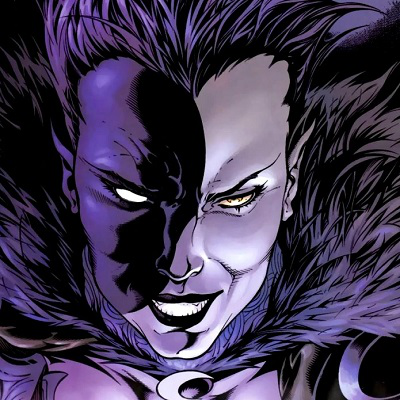

In [449]:
jean = Image.open("eclipso.jpg")
display(jean)

*Jean Loring aka Eclipso had the most appearances (168) among female villains at the time this dataset was made. She is canonically dead, and trailed behind nine male villains, including Lex Luthor, who led the pack with 677 appearances.*

Stratifying by good and evil, men still overrepresent both groups (p = 0 for both tests). They are overrepresented as villains by 64.4%, and heroes by 43.0%. Women are more underrepresented among villains (61.4% lower) than among heroes ( 40.7% lower). There are no nonbinary heroes at all, while the degree of underrepresentation slightly decreases for villains (92.9%).

### Good:

#### Observed Counts

In [450]:
dc_good.groupby(dc_good.GENDER).APPEARANCES.sum()

GENDER
Female Characters    28981.0
Male Characters      69822.0
Name: APPEARANCES, dtype: float64

#### Contingency Table and chi-squared test

In [451]:
gooddict = {'Gender': ['Female','Male','Nonbinary'],
                'Expected Sum of Appearances': [.507*totalapp_good, .489*totalapp_good, .004*totalapp_good],
                'Actual Sum of Appearances':   [30009, 69822, 0],
             }
goodDF = pd.DataFrame(gooddict, columns=['Gender', 'Expected Sum of Appearances', 'Actual Sum of Appearances'])
goodDF = goodDF.round(decimals = 3)
goodDF['Difference'] =  goodDF['Actual Sum of Appearances'] - goodDF['Expected Sum of Appearances']
goodDF['% Difference'] = goodDF['Difference'] / goodDF['Expected Sum of Appearances']

goodDF

,Gender,Expected Sum of Appearances,Actual Sum of Appearances,Difference,% Difference
0,Female,50093.121,30009,-20084.121,-0.400936
1,Male,48314.667,69822,21507.333,0.445151
2,Nonbinary,395.212,0,-395.212,-1.000000


In [452]:
stats.chisquare(f_obs = [30009, 69822,0], f_exp = [50614.317, 48817.359, 399.324])
stats.chisquare(f_obs = [3000, 3000,3000], f_exp = [4000, 2000,3000])

Power_divergenceResult(statistic=750.0, pvalue=1.3790159402541667e-163)

### Evil:

#### Observed:

In [453]:
dc_evil.groupby(dc_evil.GENDER).APPEARANCES.sum()

GENDER
Female Characters        5544.0
Male Characters         22775.0
Nonbinary Characters        8.0
Name: APPEARANCES, dtype: float64

#### Contingency table and chi-squared test:

In [454]:
evildict = {'Gender': ['Female','Male','Nonbinary'],
                'Expected Sum of Appearances': [.507*totalapp_bad, .489*totalapp_bad, .004*totalapp_bad],
                'Actual Sum of Appearances':   [5546, 22773, 8],
             }
evilDF = pd.DataFrame(evildict, columns=['Gender', 'Expected Sum of Appearances', 'Actual Sum of Appearances'])
evilDF = evilDF.round(decimals = 3)
evilDF['Difference'] =  evilDF['Actual Sum of Appearances'] - evilDF['Expected Sum of Appearances']
evilDF['% Difference'] = evilDF['Difference'] / evilDF['Expected Sum of Appearances']

evilDF

,Gender,Expected Sum of Appearances,Actual Sum of Appearances,Difference,% Difference
0,Female,14361.789,5546,-8815.789,-0.613836
1,Male,13851.903,22773,8921.097,0.644034
2,Nonbinary,113.308,8,-105.308,-0.929396


In [455]:
stats.chisquare(f_obs = [5546, 22773, 8], f_exp = [14361.789, 13851.903, 113.308])

Power_divergenceResult(statistic=11254.815212080013, pvalue=0.0)

## Representation Stratified by Alive vs Dead

How do disparities look in living characters and dead characters? I created two more new dataframes to tackle this.

In [456]:
dcAlive = dc[dc.ALIVE == "Living Characters"]
dcDead = dc[dc.ALIVE == "Deceased Characters"]

In [457]:
dcDead.head(1)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,GENDER,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Transgender
11,1459,Alan Scott (New Earth),\/wiki\/Alan_Scott_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Deceased Characters,969.0,"1940, July",1940.0,NaN


I was getting tired of calculating observed values, so I made a function that would do it quickly for me:

In [458]:
def getSum(x):
    return(x.groupby(x.GENDER).APPEARANCES.sum())

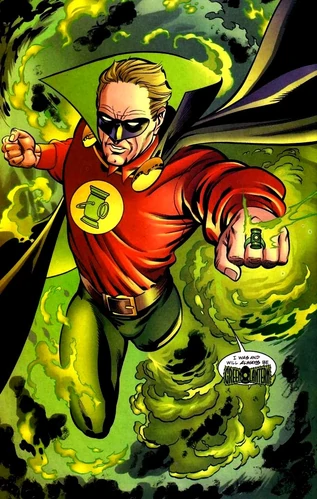

In [459]:
alan = Image.open("alan_scott.jpg")
display(alan)

*Alan Scott, the first Green Lantern, died in the New Earth universe after a whopping 969 appearances.*

Once again, it's found that p=0 for both tests and the appearances are not representative. The Male/Female discrepancy is greater (in favor of men) among dead characters than living characters. Women are underrepresented by 42.1% among living characters and 57.8% among dead characters. For nonbinary representation, on the other hand, the only character is dead.

### Living Characters:

In [460]:
getSum(dcAlive)

GENDER
Female Characters    34060.0
Male Characters      84497.0
Name: APPEARANCES, dtype: float64

In [461]:
getcontingencyTable(35088,84497,0,35088+84497)

,Gender,Expected Sum of Appearances,Actual Sum of Appearances,Difference,% Difference
0,Female,60629.595,35088,-25541.595,-0.421273
1,Male,58477.065,84497,26019.935,0.444960
2,Nonbinary,478.340,0,-478.340,-1.000000


In [462]:
stats.chisquare(f_obs = [35088,84497,0], f_exp = [60629.595, 58477.065, 478.340])

Power_divergenceResult(statistic=22816.138900864495, pvalue=0.0)

### Dead Characters:

In [463]:
getSum(dcDead)

GENDER
Female Characters        7182.0
Male Characters         26399.0
Nonbinary Characters        8.0
Name: APPEARANCES, dtype: float64

In [464]:
getcontingencyTable(7184,26397,8,7184+26397+8)

,Gender,Expected Sum of Appearances,Actual Sum of Appearances,Difference,% Difference
0,Female,17029.623,7184,-9845.623,-0.578147
1,Male,16425.021,26397,9971.979,0.607121
2,Nonbinary,134.356,8,-126.356,-0.940457


In [465]:
stats.chisquare(f_obs = [7184,26397,8], f_exp = [17029.623, 16425.021, 134.356])

Power_divergenceResult(statistic=11865.248516340911, pvalue=0.0)

## Representation Stratified by Combining Living/Dead with Good/Evil

In [466]:
dc_goodAlive = dc_good[dc_good.ALIVE == "Living Characters"]
dc_goodDead = dc_good[dc_good.ALIVE == "Deceased Characters"]
dc_evilAlive = dc_evil[dc_evil.ALIVE == "Living Characters"]
dc_evilDead = dc_evil[dc_evil.ALIVE == "Deceased Characters"]

Finally, I double stratified living status with good/evil status, creating four new dataframes.

Discrepancies hold at every double stratification, men are always overrepresented while women and nonbinary people are underrepresented. 

Men overrepresent the most as villains (about 64% for each category), and the least as living heroes (where their overrepresentation is "only" 39.7%). Conversely, women are closest to true representation as living heroes (still 37.5% under) and farthest as villains (about 61.4% under in each category). In general, discrepancies among heroes between men and women are larger among dead heroes, while for villains underrepresentation is about the same regardless of vital status.

The only nonbinary character is a dead villain, leaving them completely unrepresented in the other three groups. 



### Living Heroes

In [467]:
getSum(dc_goodAlive)

GENDER
Female Characters    24338.0
Male Characters      54687.0
Name: APPEARANCES, dtype: float64

In [468]:
getcontingencyTable(25366, 54687,0, 25366+54687)

,Gender,Expected Sum of Appearances,Actual Sum of Appearances,Difference,% Difference
0,Female,40586.871,25366,-15220.871,-0.375020
1,Male,39145.917,54687,15541.083,0.397004
2,Nonbinary,320.212,0,-320.212,-1.000000


In [469]:
stats.chisquare(f_obs = [25366, 54687, 0], f_exp = [40586.871, 39145.917, 320.212])

Power_divergenceResult(statistic=12198.207601325128, pvalue=0.0)

### Deceased Heroes

In [470]:
getSum(dc_goodDead)

GENDER
Female Characters     4643.0
Male Characters      15129.0
Name: APPEARANCES, dtype: float64

In [471]:
getcontingencyTable(4643, 15129, 0, 4643+15129)

,Gender,Expected Sum of Appearances,Actual Sum of Appearances,Difference,% Difference
0,Female,10024.404,4643,-5381.404,-0.536830
1,Male,9668.508,15129,5460.492,0.564771
2,Nonbinary,79.088,0,-79.088,-1.000000


In [472]:
stats.chisquare(f_obs = [4643, 15129, 0], f_exp = [10024.404, 9668.508, 79.088])

Power_divergenceResult(statistic=6051.915828695088, pvalue=0.0)

### Living Villains

In [473]:
getSum(dc_evilAlive)

GENDER
Female Characters     3835.0
Male Characters      15769.0
Name: APPEARANCES, dtype: float64

In [474]:
getcontingencyTable(3835, 15769, 0, 3835 + 15769)

,Gender,Expected Sum of Appearances,Actual Sum of Appearances,Difference,% Difference
0,Female,9939.228,3835,-6104.228,-0.614155
1,Male,9586.356,15769,6182.644,0.644942
2,Nonbinary,78.416,0,-78.416,-1.000000


In [475]:
stats.chisquare(f_obs = [3835, 15769, 0], f_exp = [9939.228, 9586.356, 78.416] )

Power_divergenceResult(statistic=7814.8060614481665, pvalue=0.0)

### Deceased Villains

In [476]:
getSum(dc_evilDead)

GENDER
Female Characters       1701.0
Male Characters         7006.0
Nonbinary Characters       8.0
Name: APPEARANCES, dtype: float64

In [477]:
getcontingencyTable(1703, 7004,8, 1703+7004+8)

,Gender,Expected Sum of Appearances,Actual Sum of Appearances,Difference,% Difference
0,Female,4418.505,1703,-2715.505,-0.614576
1,Male,4261.635,7004,2742.365,0.643501
2,Nonbinary,34.860,8,-26.860,-0.770511


In [478]:
stats.chisquare(f_obs = [1703, 7004, 8], f_exp = [4418.505, 4261.635, 34.860])

Power_divergenceResult(statistic=3454.2925367845905, pvalue=0.0)

# Conclusion

The results I found using this modified dataset overwhelmingly indicate that as of 2014, DC's gender demographics swung disproprotionately male in general, in all four single-level stratifications, and in all four double-stratifications. Chi-squared tests comparing  the actual count of appearances by gender to what you would expect in a comics universe that represents each gender equally, consistently found significant evidence that the difference was greater than by random chance (and favored men over nonbinary and female characters) regardless of the stratification on alignment, living status, or a combination of the two used.

Women's representation was, overall, 40% lower than we'd expect, and nonbinary was behind by over 95%. 

Disparities for women were the worst among villains (about 61% whether living or dead), but still highly prominent in heroes (40.7%). Even in their "best" category -- living heroes -- women's representation is over 35 percent lower than we'd expect in a representative universe. Discrepancies are even worse for nonbinary people, who are completely unrepresented by heroes and living villains, and whose representation in their "best" category (dead villains... yikes) was still 77.1% lower than we'd expect in a representative universe.



## Further Exploration

### Eyes on the (post-2014) Future: Which Major Existing Characters Could Reverse the Trend?

#### Examining percent of appearances contained in the top 1% and top 10% most-appearing characters:

Verify number of characters via shape:

In [479]:
dc.shape

(6751, 13)

The data is already sorted by appearances, which makes grabbing a percentile very easy. The top 1% of characters by appearance (rounding down), for instance, is simply the first 67 observations. What percent of the total appearances do their appearances make up? 

##### One percenters:

In [480]:
dcOnePercenters = dc.head(67) # the data is already sorted by appearances
dcOnePercenters.APPEARANCES.sum() / dc.APPEARANCES.sum()

0.2832807570977918

##### Ten percenters:

In [481]:
dcTenPercenters = dc.head(675)
dcTenPercenters.APPEARANCES.sum() / dc.APPEARANCES.sum()

0.6881440588853838

So, appearance data *is* very top heavy. The top 1% of characters by appearances make up 28% of the total appearances. The top 10% make up 69%. Thus, it makes a lot of mathematical sense to think that if the composition of the top 1 or 10% changes, we'll see a big swing in overall appearances by gender.

While the dataset tells us nonbinary representation will require the emergence of a new character, it's possible female representation could be improved through existing, living characters. 

That observation in mind, I took a peek at the 5 living female characters with the most appearances:

### The 5 Living Female Characters who Appear the Most:

In [482]:
dc[(dc.GENDER == "Female Characters") & (dc.ALIVE == "Living Characters")].head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,GENDER,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Transgender
5,1448,Wonder Woman (Diana Prince),\/wiki\/Wonder_Woman_(Diana_Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,1231.0,"1941, December",1941.0,NaN
8,71760,Dinah Laurel Lance (New Earth),\/wiki\/Dinah_Laurel_Lance_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1075.0,"1969, November",1969.0,NaN
12,1905,Barbara Gordon (New Earth),\/wiki\/Barbara_Gordon_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Red Hair,Female Characters,Living Characters,951.0,"1967, January",1967.0,NaN
14,23383,Lois Lane (New Earth),\/wiki\/Lois_Lane_(New_Earth),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,934.0,"1938, June",1938.0,NaN
21,1580,Kara Zor-L (Earth-Two),\/wiki\/Kara_Zor-L_(Earth-Two),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,635.0,"1976, February",1976.0,NaN


Approximate average year of first appearance:

In [483]:
(1969 + 1967 + 1938 + 1976 + 1941)/5

1958.2

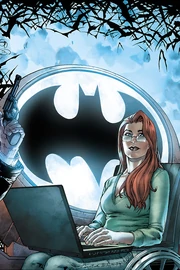

In [484]:
batgirl = Image.open("batgirl2.jpg");
display(batgirl)

*Barbara Gordon*

To little surprise, Wonder Woman tops the list. Joining her are Dinah Laurel Lance (aka Black Canary), Barbara Gordon (Batgirl), Lois Lane, and Kara-Zor-L (Power Girl). Most of these ladies have been around a long time (average first year: 1958!), and they're all good aligned. What about villains, where women are more underrepresented?

### The 5 Living Female Villains Who Appear the Most:

In [485]:
dc[(dc.GENDER == "Female Characters") & (dc.ALIVE == "Living Characters") & (dc.ALIGN == "Bad Characters")].head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,GENDER,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Transgender
183,1469,Harleen Quinzel (New Earth),\/wiki\/Harleen_Quinzel_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,153.0,"1999, October",1999.0,NaN
286,1643,Jade Nguyen (New Earth),\/wiki\/Jade_Nguyen_(New_Earth),Secret Identity,Bad Characters,Green Eyes,Black Hair,Female Characters,Living Characters,103.0,"1983, August",1983.0,NaN
301,16693,Tef\u00e9 Holland (New Earth),\/wiki\/Tef%C3%A9_Holland_(New_Earth),NaN,Bad Characters,Blue Eyes,White Hair,Female Characters,Living Characters,97.0,"1989, December",1989.0,NaN
369,1707,Circe (New Earth),\/wiki\/Circe_(New_Earth),Public Identity,Bad Characters,Red Eyes,Purple Hair,Female Characters,Living Characters,81.0,"1988, August",1988.0,NaN
396,8809,Lashina (New Earth),\/wiki\/Lashina_(New_Earth),Secret Identity,Bad Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,77.0,"1972, February",1972.0,NaN


In [486]:
(1999 + 1983 + 1989 + 1988 + 1972)/5

1986.2

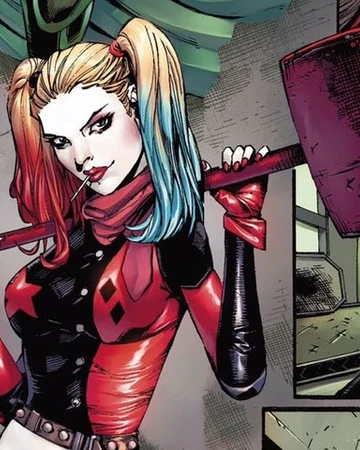

In [487]:
harlz2 = Image.open("harley2.jpeg")
display(harlz2)

Harley Quinn tops our list of living villains... and that's pre-2015! And she only joined in 1999! She's joined by a mix of villains who're generally much newer than the top 5 heroes (on average, our top five living villainesses joined in 1986).

If I were making fun conjectures in 2014, I might have thought Harley was on her way to doing something extraordinary, but then again I might have thought her rise was unsustainable -- I checked and there were a few female villains with more appearances than her... all of whom are now canonically dead. To give you an idea of where she was at the time, this dataset was published before Margot Robbie was announced to play Harley in Suicide Squad (2016 version). She was at a big pivot point, which *is* perhaps cause for hope, because we've now seen which way that pivot went (more on this in conclusion).

Post-2014, Harley has appeared another 660 times (50 more times in new earth, and 610 times in Prime Earth, DC's new universe).  